In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns; sns.set()

#Colab use
#from google.colab import files
#uploaded = files.upload()
#import io

In [2]:
#get single train_set
raw_data = pd.read_csv("../Data/RUL_Train_001.csv")

#Colab use
#raw_data = pd.read_csv(io.BytesIO(uploaded['RUL_Train_001.csv']))

setting_names = ['OpSet1', 'OpSet2', 'OpSet3']
drop_cols = setting_names + ['Cycle']

raw_data = raw_data.drop(drop_cols, 1)

# Correlation Heatmap

[Text(0, 0.5, 'SensorMeasure1'),
 Text(0, 1.5, 'SensorMeasure2'),
 Text(0, 2.5, 'SensorMeasure3'),
 Text(0, 3.5, 'SensorMeasure4'),
 Text(0, 4.5, 'SensorMeasure5'),
 Text(0, 5.5, 'SensorMeasure6'),
 Text(0, 6.5, 'SensorMeasure7'),
 Text(0, 7.5, 'SensorMeasure8'),
 Text(0, 8.5, 'SensorMeasure9'),
 Text(0, 9.5, 'SensorMeasure10'),
 Text(0, 10.5, 'SensorMeasure11'),
 Text(0, 11.5, 'SensorMeasure12'),
 Text(0, 12.5, 'SensorMeasure13'),
 Text(0, 13.5, 'SensorMeasure14'),
 Text(0, 14.5, 'SensorMeasure15'),
 Text(0, 15.5, 'SensorMeasure16'),
 Text(0, 16.5, 'SensorMeasure17'),
 Text(0, 17.5, 'SensorMeasure18'),
 Text(0, 18.5, 'SensorMeasure19'),
 Text(0, 19.5, 'SensorMeasure20'),
 Text(0, 20.5, 'SensorMeasure21'),
 Text(0, 21.5, 'RUL')]

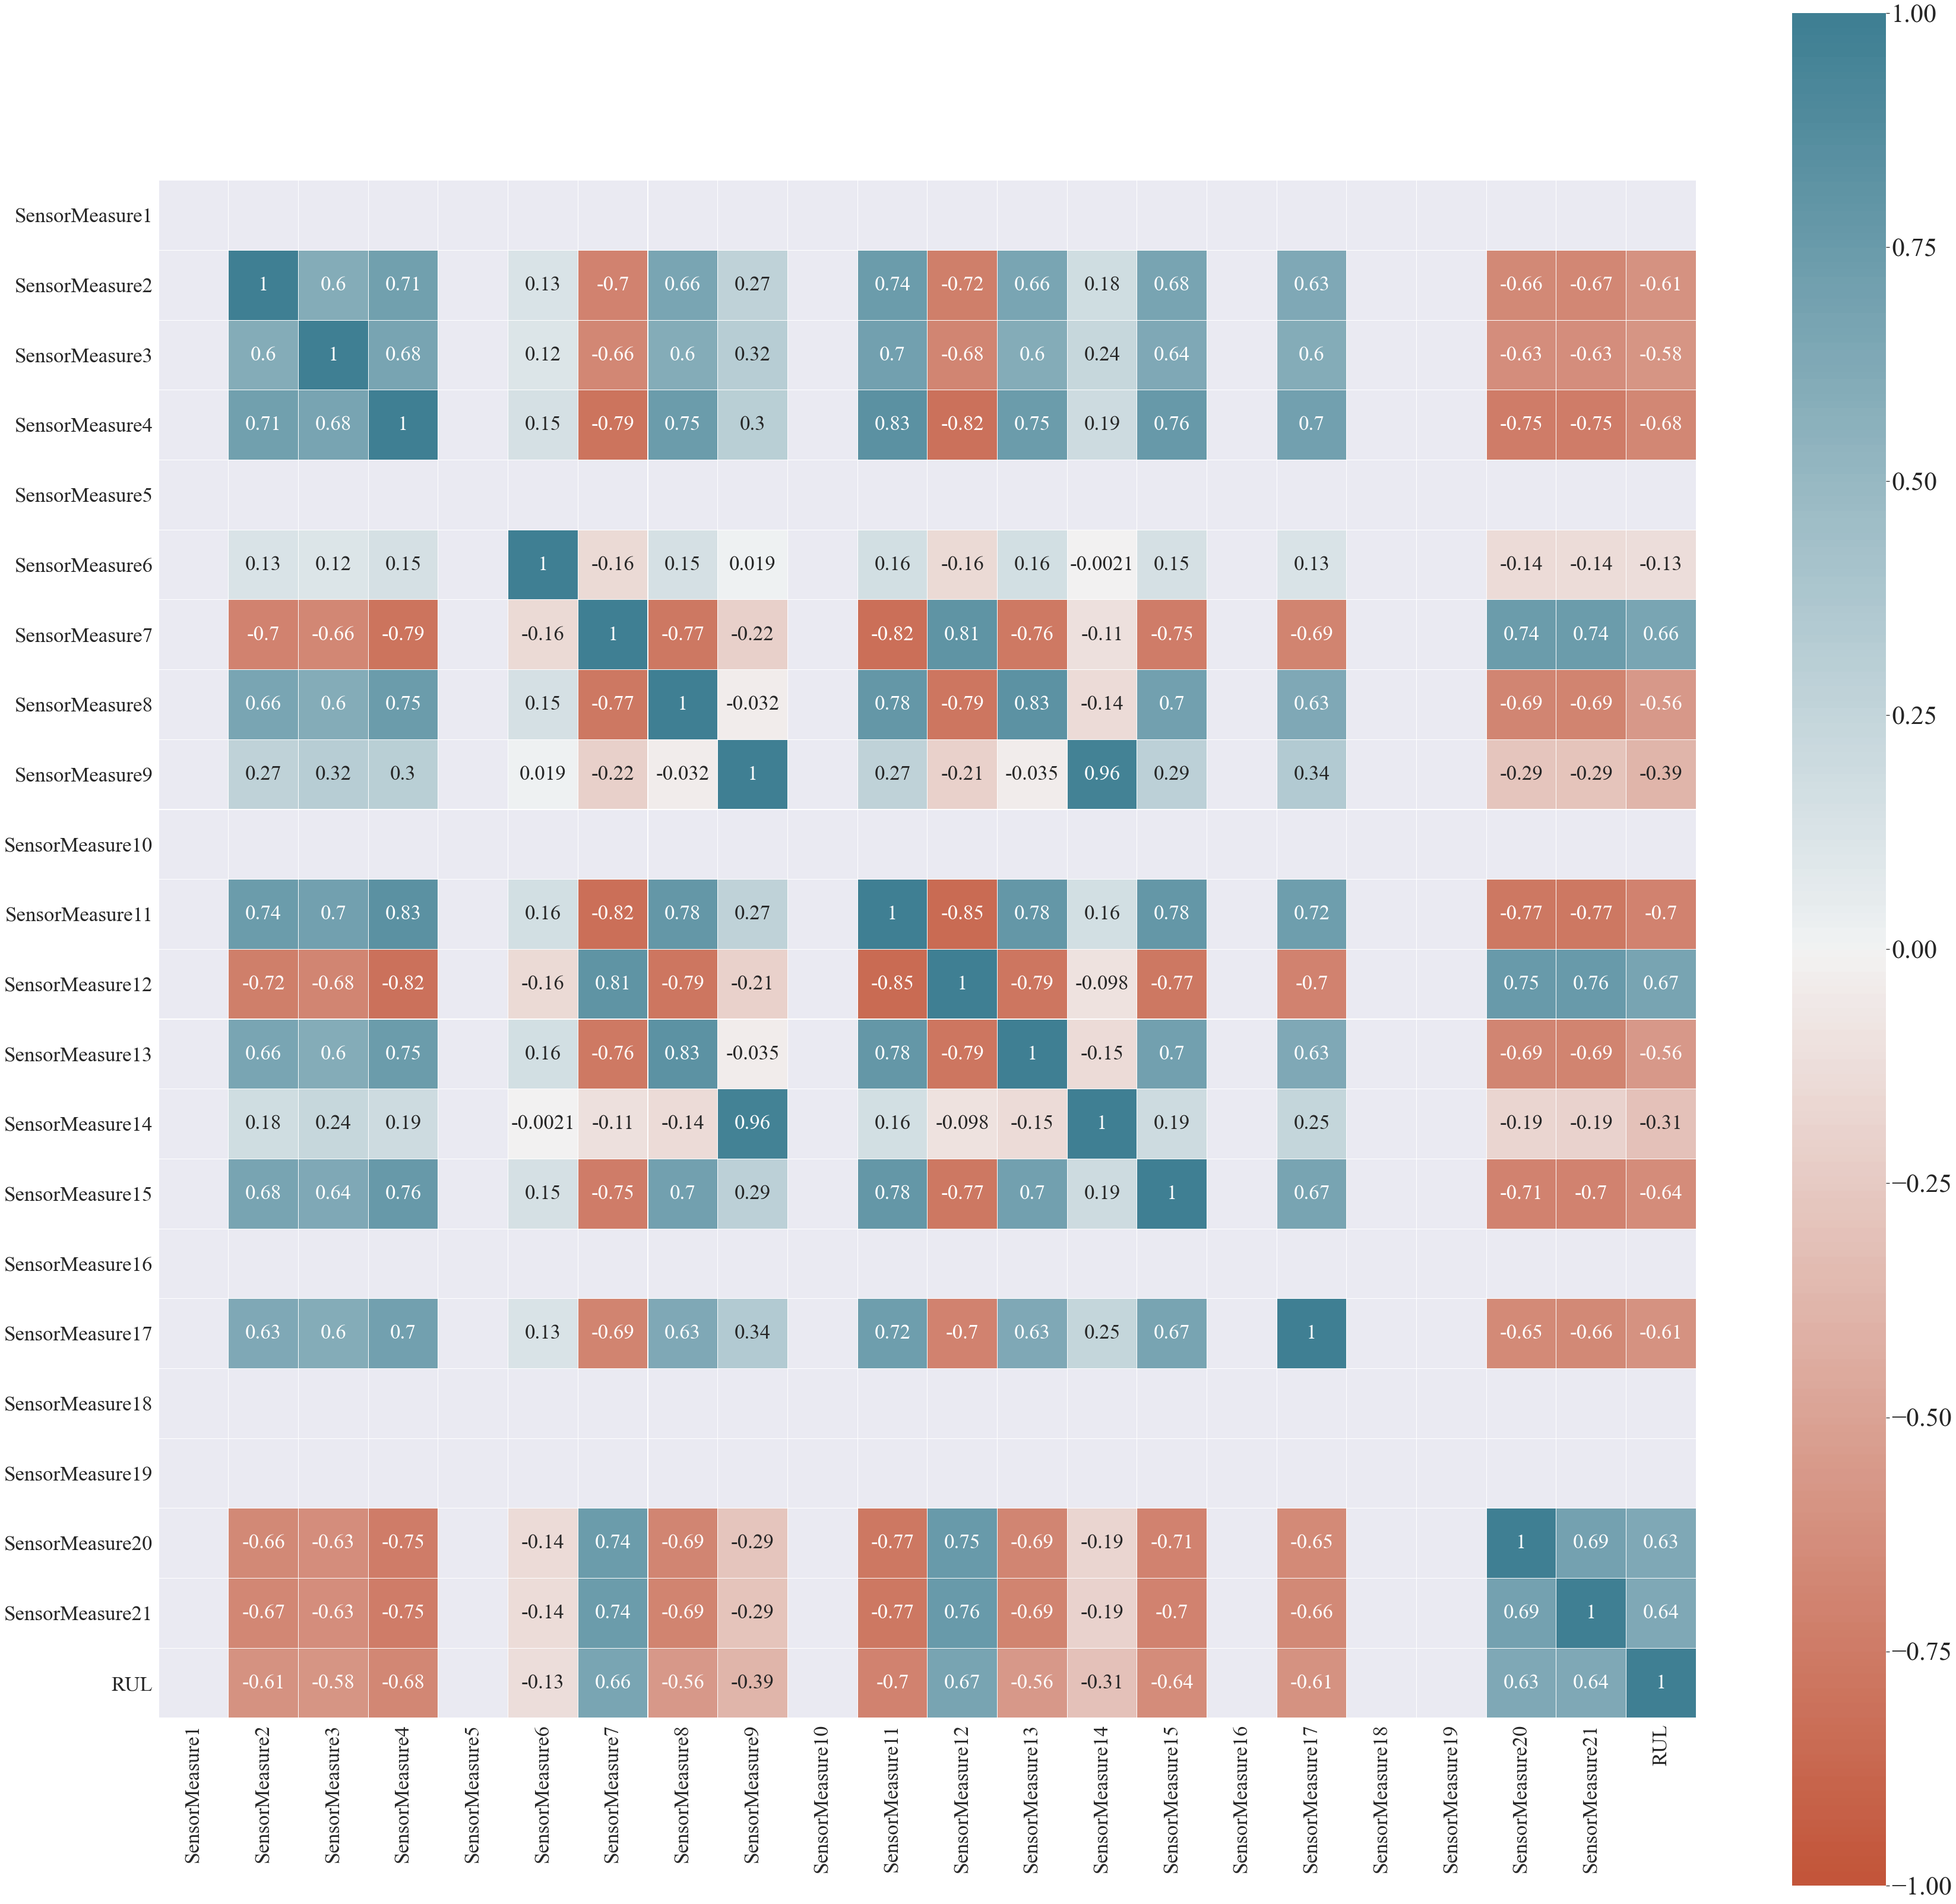

In [3]:
corrmat = raw_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(58,58))
sns.set(font_scale=4,font="Times New Roman")

g=sns.heatmap(raw_data[top_corr_features].corr(),
              vmin=-1, vmax=1, center=0,
              cmap=sns.diverging_palette(20, 220, n=200),
              square=True,
              linewidths=0.1, 
              annot=True, 
              annot_kws={"size":35})

g.set_xticklabels(g.get_xmajorticklabels(), fontsize = 35)
g.set_yticklabels(g.get_xmajorticklabels(), fontsize = 35)

# Drop columns with less than 0.5 correlation with RUL

In [4]:
delete_columns=[]

for col in raw_data.columns:
    corr = raw_data[col].corr(raw_data['RUL'])
    if abs(corr)>0.5:
        pass
    else:    
        delete_columns.append(col)
        
delete_columns

['SensorMeasure1',
 'SensorMeasure5',
 'SensorMeasure6',
 'SensorMeasure9',
 'SensorMeasure10',
 'SensorMeasure14',
 'SensorMeasure16',
 'SensorMeasure18',
 'SensorMeasure19']

In [5]:
df = raw_data.drop(columns=delete_columns)

df

,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure7,SensorMeasure8,SensorMeasure11,SensorMeasure12,SensorMeasure13,SensorMeasure15,SensorMeasure17,SensorMeasure20,SensorMeasure21,RUL
0,641.82,1589.70,1400.60,554.36,2388.06,47.47,521.66,2388.02,8.4195,392,39.06,23.4190,191
1,642.15,1591.82,1403.14,553.75,2388.04,47.49,522.28,2388.07,8.4318,392,39.00,23.4236,190
2,642.35,1587.99,1404.20,554.26,2388.08,47.27,522.42,2388.03,8.4178,390,38.95,23.3442,189
3,642.35,1582.79,1401.87,554.45,2388.11,47.13,522.86,2388.08,8.3682,392,38.88,23.3739,188
4,642.37,1582.85,1406.22,554.00,2388.06,47.28,522.19,2388.04,8.4294,393,38.90,23.4044,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,643.49,1597.98,1428.63,551.43,2388.19,48.07,519.49,2388.26,8.4956,397,38.49,22.9735,4
20627,643.54,1604.50,1433.58,550.86,2388.23,48.04,519.68,2388.22,8.5139,395,38.30,23.1594,3
20628,643.42,1602.46,1428.18,550.94,2388.24,48.09,520.01,2388.24,8.5646,398,38.44,22.9333,2
20629,643.23,1605.26,1426.53,550.68,2388.25,48.39,519.67,2388.23,8.5389,395,38.29,23.0640,1


# Updated Correlation Heatmap

[Text(0, 0.5, 'SensorMeasure2'),
 Text(0, 1.5, 'SensorMeasure3'),
 Text(0, 2.5, 'SensorMeasure4'),
 Text(0, 3.5, 'SensorMeasure7'),
 Text(0, 4.5, 'SensorMeasure8'),
 Text(0, 5.5, 'SensorMeasure11'),
 Text(0, 6.5, 'SensorMeasure12'),
 Text(0, 7.5, 'SensorMeasure13'),
 Text(0, 8.5, 'SensorMeasure15'),
 Text(0, 9.5, 'SensorMeasure17'),
 Text(0, 10.5, 'SensorMeasure20'),
 Text(0, 11.5, 'SensorMeasure21'),
 Text(0, 12.5, 'RUL')]

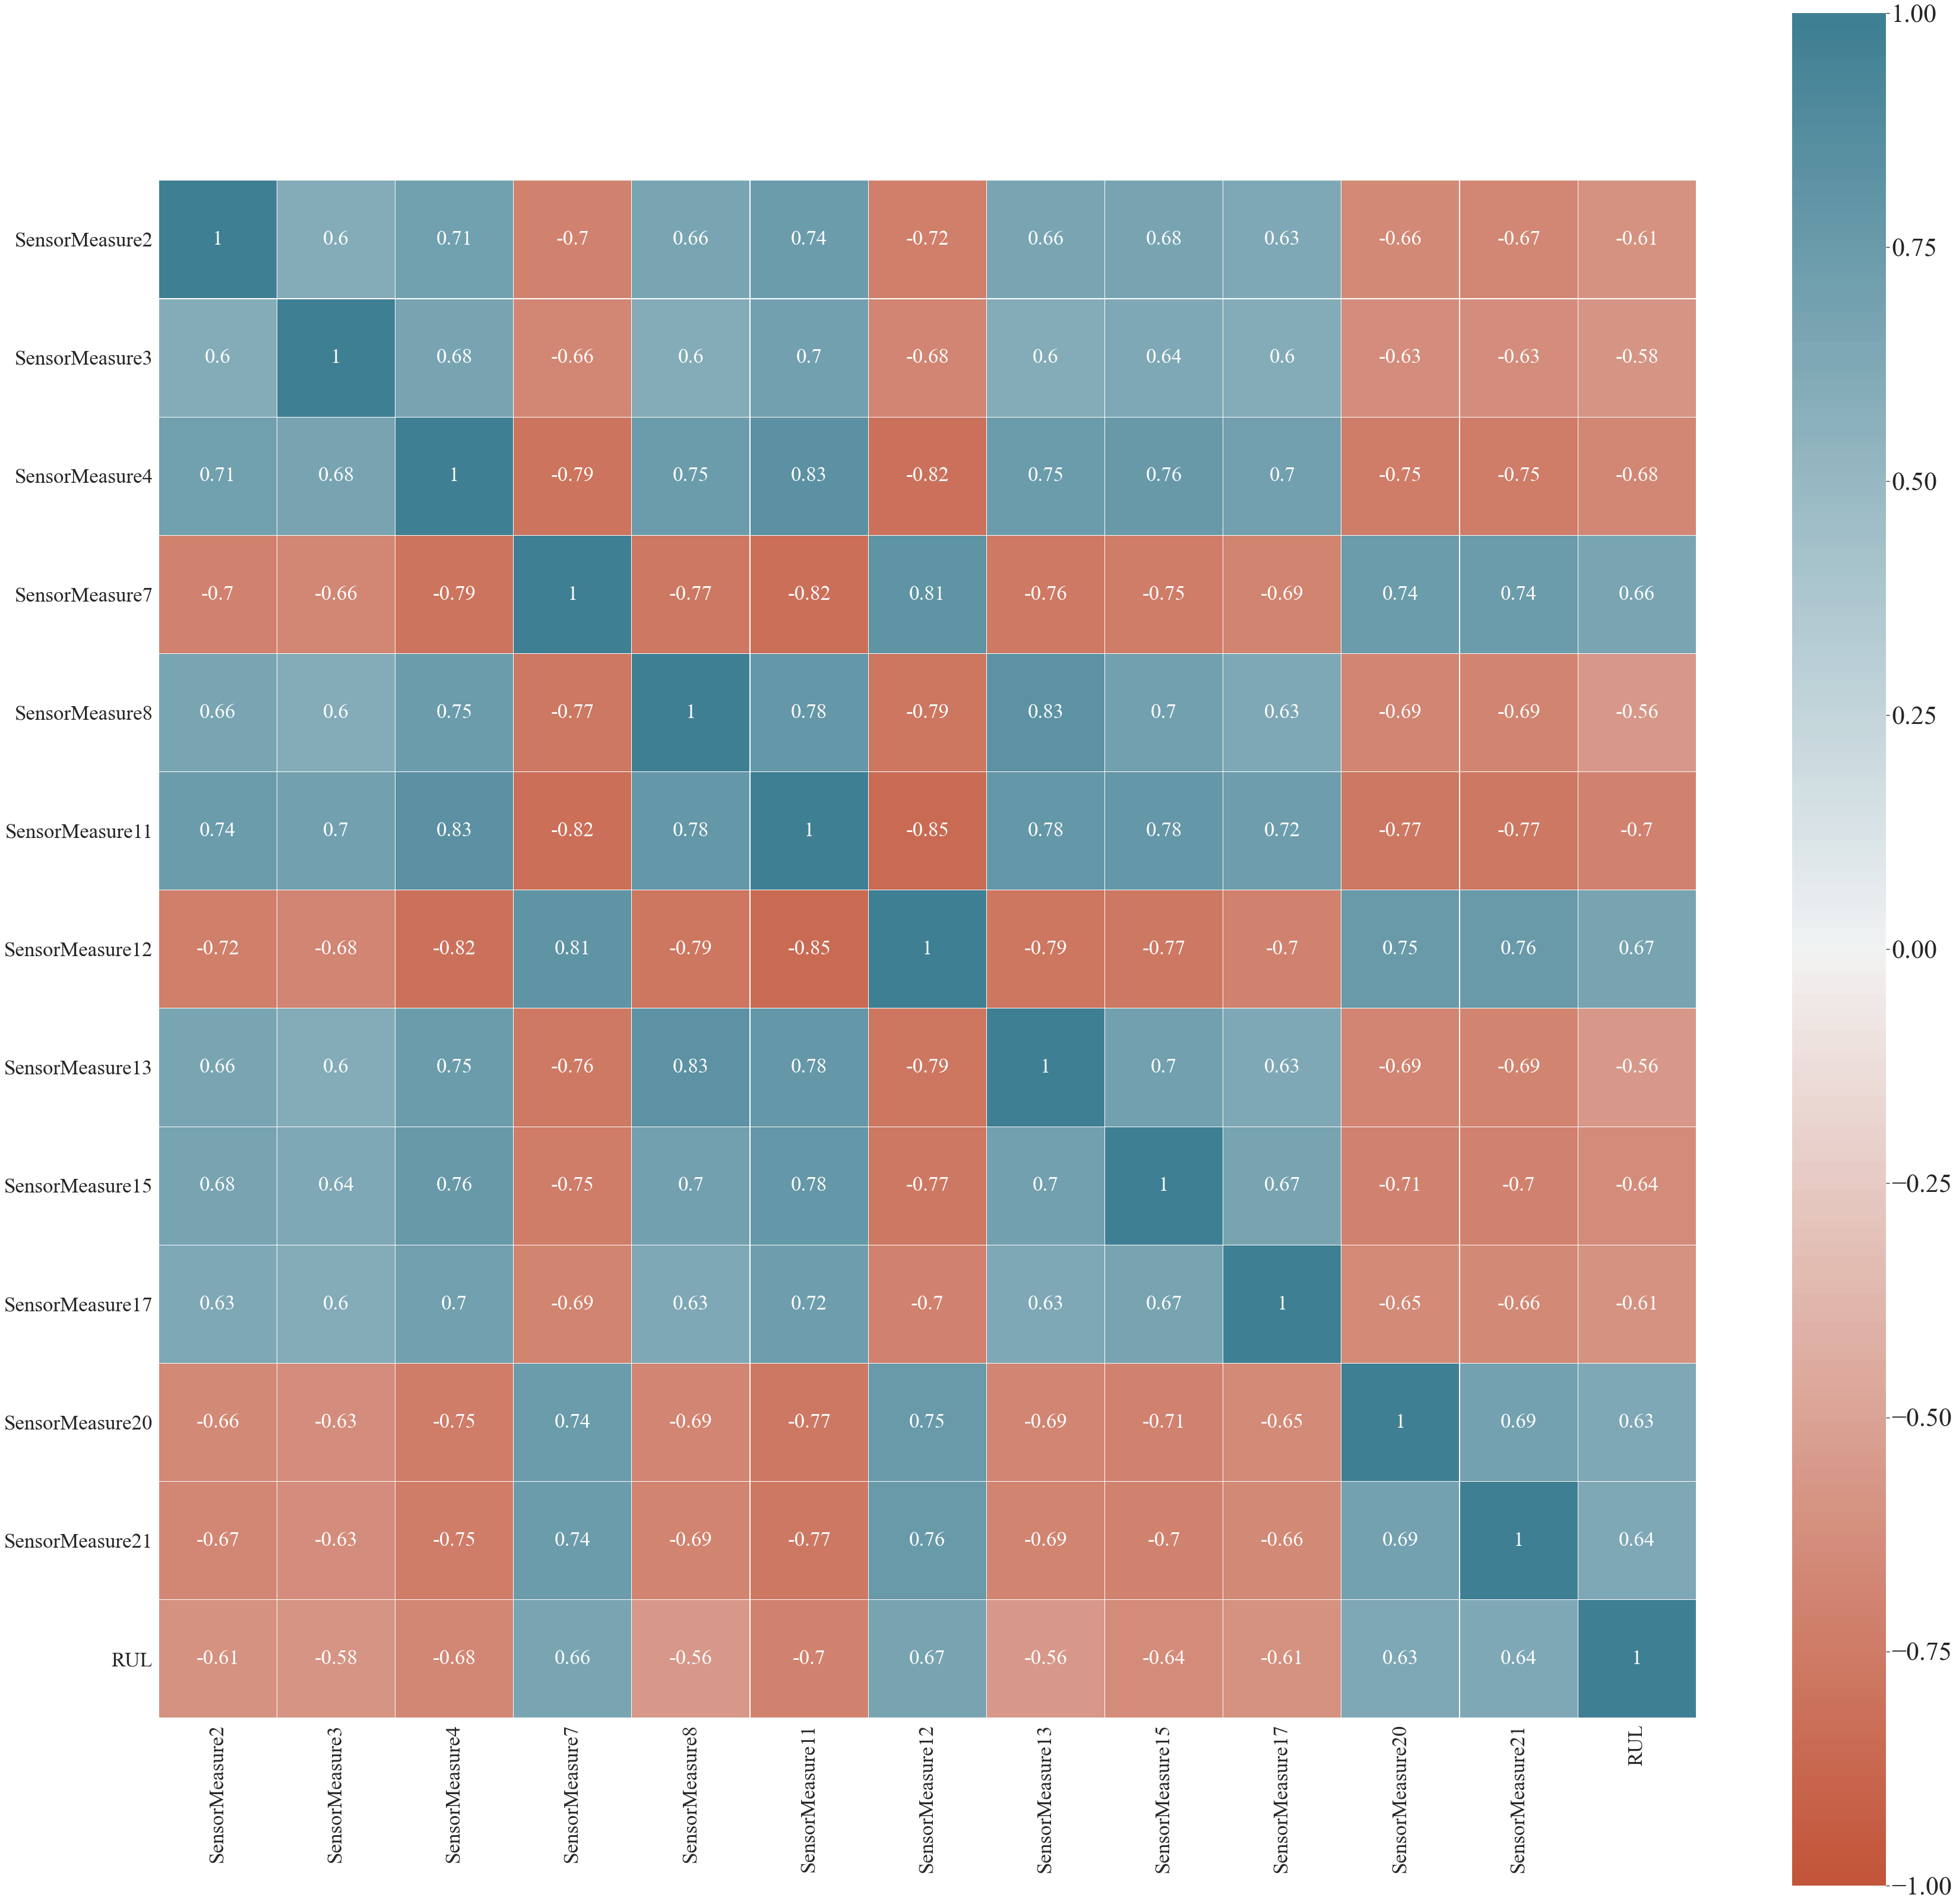

In [6]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(58,58))
sns.set(font_scale=4,font="Times New Roman")

g=sns.heatmap(df[top_corr_features].corr(),
              #cmap="RdYlGn",
              vmin=-1, vmax=1, center=0,
              cmap=sns.diverging_palette(20, 220, n=200),
              square=True,
              linewidths=0.1, 
              annot=True, 
              annot_kws={"size":35})

g.set_xticklabels(g.get_xmajorticklabels(), fontsize = 35)
g.set_yticklabels(g.get_xmajorticklabels(), fontsize = 35)

# Test Data

In [7]:
#get single train_set
raw_data = pd.read_csv("../Data/test_FD001.txt", sep=' ', header = None)

#Colab use
#raw_data = pd.read_csv(io.BytesIO(uploaded['test_FD001.txt']), sep=' ', header = None)

if len(raw_data.columns) > 26:
    raw_data = raw_data.drop([0, 1, 2, 3, 4, 26 ,27], axis='columns')

raw_data

,5,6,7,8,9,10,11,12,13,14,...,16,17,18,19,20,21,22,23,24,25
0,518.67,643.02,1585.29,1398.21,14.62,21.61,553.90,2388.04,9050.17,1.3,...,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,518.67,641.71,1588.45,1395.42,14.62,21.61,554.85,2388.01,9054.42,1.3,...,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,518.67,642.46,1586.94,1401.34,14.62,21.61,554.11,2388.05,9056.96,1.3,...,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,518.67,642.44,1584.12,1406.42,14.62,21.61,554.07,2388.03,9045.29,1.3,...,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,518.67,642.51,1587.19,1401.92,14.62,21.61,554.16,2388.01,9044.55,1.3,...,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,518.67,643.24,1599.45,1415.79,14.62,21.61,553.41,2388.02,9142.37,1.3,...,520.69,2388.00,8213.28,8.4715,0.03,394,2388,100.0,38.65,23.1974
13092,518.67,643.22,1595.69,1422.05,14.62,21.61,553.22,2388.05,9140.68,1.3,...,521.05,2388.09,8210.85,8.4512,0.03,395,2388,100.0,38.57,23.2771
13093,518.67,643.44,1593.15,1406.82,14.62,21.61,553.04,2388.11,9146.81,1.3,...,521.18,2388.04,8217.24,8.4569,0.03,395,2388,100.0,38.62,23.2051
13094,518.67,643.26,1594.99,1419.36,14.62,21.61,553.37,2388.07,9148.85,1.3,...,521.33,2388.08,8220.48,8.4711,0.03,395,2388,100.0,38.66,23.2699


In [8]:
features = ['SensorMeasure1', 'SensorMeasure2', 'SensorMeasure3', 
            'SensorMeasure4', 'SensorMeasure5', 'SensorMeasure6', 
            'SensorMeasure7', 'SensorMeasure8', 'SensorMeasure9', 
            'SensorMeasure10', 'SensorMeasure11', 'SensorMeasure12', 
            'SensorMeasure13', 'SensorMeasure14', 'SensorMeasure15', 
            'SensorMeasure16', 'SensorMeasure17', 'SensorMeasure18', 
            'SensorMeasure19', 'SensorMeasure20', 'SensorMeasure21']

raw_data.columns = features

display(raw_data)

,SensorMeasure1,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure5,SensorMeasure6,SensorMeasure7,SensorMeasure8,SensorMeasure9,SensorMeasure10,...,SensorMeasure12,SensorMeasure13,SensorMeasure14,SensorMeasure15,SensorMeasure16,SensorMeasure17,SensorMeasure18,SensorMeasure19,SensorMeasure20,SensorMeasure21
0,518.67,643.02,1585.29,1398.21,14.62,21.61,553.90,2388.04,9050.17,1.3,...,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,518.67,641.71,1588.45,1395.42,14.62,21.61,554.85,2388.01,9054.42,1.3,...,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,518.67,642.46,1586.94,1401.34,14.62,21.61,554.11,2388.05,9056.96,1.3,...,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,518.67,642.44,1584.12,1406.42,14.62,21.61,554.07,2388.03,9045.29,1.3,...,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,518.67,642.51,1587.19,1401.92,14.62,21.61,554.16,2388.01,9044.55,1.3,...,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,518.67,643.24,1599.45,1415.79,14.62,21.61,553.41,2388.02,9142.37,1.3,...,520.69,2388.00,8213.28,8.4715,0.03,394,2388,100.0,38.65,23.1974
13092,518.67,643.22,1595.69,1422.05,14.62,21.61,553.22,2388.05,9140.68,1.3,...,521.05,2388.09,8210.85,8.4512,0.03,395,2388,100.0,38.57,23.2771
13093,518.67,643.44,1593.15,1406.82,14.62,21.61,553.04,2388.11,9146.81,1.3,...,521.18,2388.04,8217.24,8.4569,0.03,395,2388,100.0,38.62,23.2051
13094,518.67,643.26,1594.99,1419.36,14.62,21.61,553.37,2388.07,9148.85,1.3,...,521.33,2388.08,8220.48,8.4711,0.03,395,2388,100.0,38.66,23.2699


In [9]:
df = raw_data.drop(columns=delete_columns)

df

,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure7,SensorMeasure8,SensorMeasure11,SensorMeasure12,SensorMeasure13,SensorMeasure15,SensorMeasure17,SensorMeasure20,SensorMeasure21
0,643.02,1585.29,1398.21,553.90,2388.04,47.20,521.72,2388.03,8.4052,392,38.86,23.3735
1,641.71,1588.45,1395.42,554.85,2388.01,47.50,522.16,2388.06,8.3803,393,39.02,23.3916
2,642.46,1586.94,1401.34,554.11,2388.05,47.50,521.97,2388.03,8.4441,393,39.08,23.4166
3,642.44,1584.12,1406.42,554.07,2388.03,47.28,521.38,2388.05,8.3917,391,39.00,23.3737
4,642.51,1587.19,1401.92,554.16,2388.01,47.31,522.15,2388.03,8.4031,390,38.99,23.4130
...,...,...,...,...,...,...,...,...,...,...,...,...
13091,643.24,1599.45,1415.79,553.41,2388.02,47.69,520.69,2388.00,8.4715,394,38.65,23.1974
13092,643.22,1595.69,1422.05,553.22,2388.05,47.60,521.05,2388.09,8.4512,395,38.57,23.2771
13093,643.44,1593.15,1406.82,553.04,2388.11,47.57,521.18,2388.04,8.4569,395,38.62,23.2051
13094,643.26,1594.99,1419.36,553.37,2388.07,47.61,521.33,2388.08,8.4711,395,38.66,23.2699


[Text(0, 0.5, 'SensorMeasure2'),
 Text(0, 1.5, 'SensorMeasure3'),
 Text(0, 2.5, 'SensorMeasure4'),
 Text(0, 3.5, 'SensorMeasure7'),
 Text(0, 4.5, 'SensorMeasure8'),
 Text(0, 5.5, 'SensorMeasure11'),
 Text(0, 6.5, 'SensorMeasure12'),
 Text(0, 7.5, 'SensorMeasure13'),
 Text(0, 8.5, 'SensorMeasure15'),
 Text(0, 9.5, 'SensorMeasure17'),
 Text(0, 10.5, 'SensorMeasure20'),
 Text(0, 11.5, 'SensorMeasure21')]

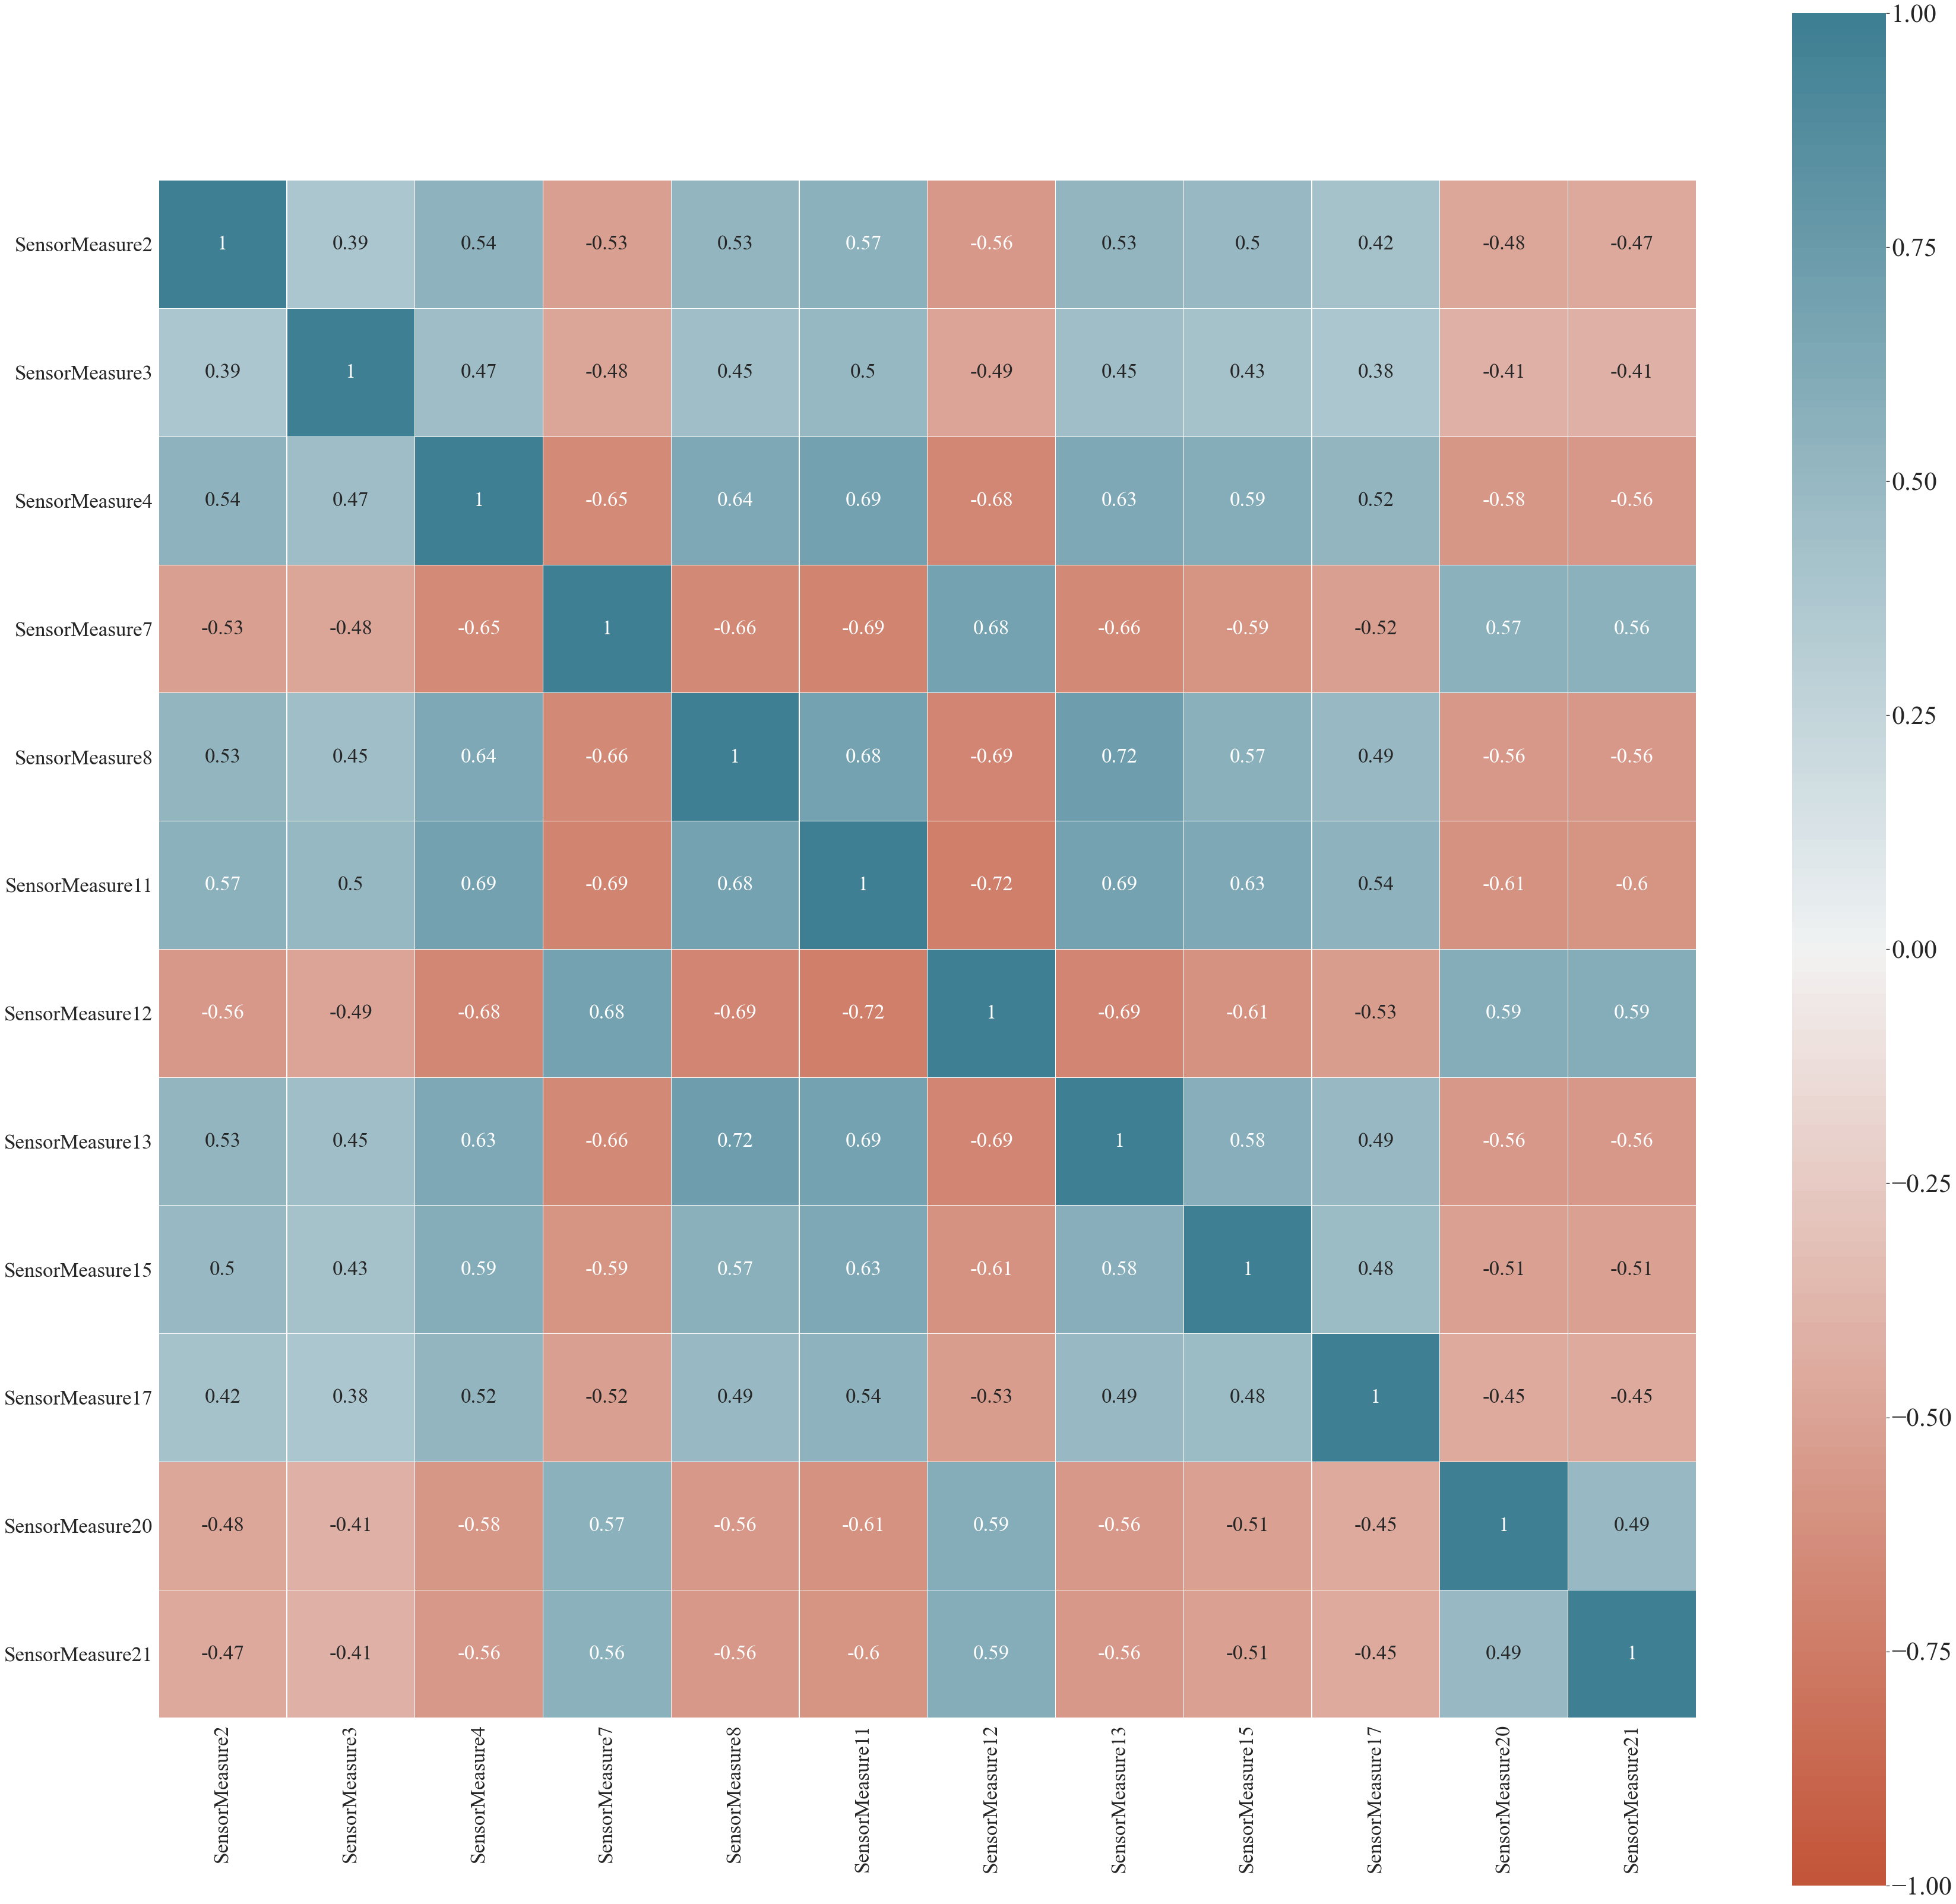

In [10]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(58,58))
sns.set(font_scale=4,font="Times New Roman")

g=sns.heatmap(df[top_corr_features].corr(),
              #cmap="RdYlGn",
              vmin=-1, vmax=1, center=0,
              cmap=sns.diverging_palette(20, 220, n=200),
              square=True,
              linewidths=0.1, 
              annot=True, 
              annot_kws={"size":35})

g.set_xticklabels(g.get_xmajorticklabels(), fontsize = 35)
g.set_yticklabels(g.get_xmajorticklabels(), fontsize = 35)